Trabalhando com Planilhas do Excel

In [9]:
import pandas as pd

In [13]:
df1 = pd.read_excel('/content/drive/MyDrive/datasets/Aracaju.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/datasets/Fortaleza.xlsx')
df3 = pd.read_excel('/content/drive/MyDrive/datasets/Natal.xlsx')
df4 = pd.read_excel('/content/drive/MyDrive/datasets/Recife.xlsx')
df5 = pd.read_excel('/content/drive/MyDrive/datasets/Salvador.xlsx')

In [17]:
#juntando os arquivos
df = pd.concat([df1, df2, df3, df4, df5])

In [18]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [22]:
df['Cidade'].unique()

array(['Aracaju', 'Fortaleza', 'Natal', 'Recife', 'Salvador'],
      dtype=object)

In [23]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [25]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
43,Natal,2019-04-01,538.00,853,3
55,Salvador,2019-01-01,36.62,1036,1
91,Fortaleza,2019-01-01,37.49,1002,1
122,Natal,2019-01-02,13.27,1037,1
10,Natal,2018-10-27,828.00,852,4


In [27]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [28]:
#Alterando o tipo de dado - de int64 para object
df['LojaID'] = df['LojaID'].astype('object')

In [29]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [30]:
#Verificando se existem valores nulos
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [31]:
#Apagando campos nulos
df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)

In [32]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [33]:
df['Vendas'].mean()

122.61180089485438

In [36]:
#Substituindo os valores nulos por zero
df['Vendas'].fillna(0, inplace=True)

In [38]:
#Apagando as linhas com valore nulos 
df.dropna(inplace=True)

In [39]:
#Apagando as linhas com valore nulos com base apenas em 1 coluna
df.dropna(subset=['Vendas'], inplace=True)

In [40]:
#Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how='all', inplace=True)

Criando colunas novas

In [41]:
#Criando a coluna de receita
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [43]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [44]:
#Criando a coluna Receita/Vendas 
df['Receita/Vendas'] = df['Receita'] / df['Vendas']

In [46]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [50]:
#Retornando a maior receita
df['Receita'].max()

3544.0

In [48]:
#Retornando a menor receita
df['Receita'].min()

3.34

In [51]:
#nlargest - Pegando as 3 maiores receitas da base
df.nlargest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [53]:
#nsmallest - Pegando as 3 menores receitas da base
df.nsmallest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [56]:
#Agrupando por cidade
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [65]:
#Ordenando o conjunto de dados
df.sort_values('Receita', ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


Trabalhando com datas

In [66]:
#Transformando a coluna de data em tipo inteiro
df['Data'] = df['Data'].astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [67]:
#Verificando o tipo de dado em cada coluna
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [68]:
#Transformando coluna de data em data
df['Data'] = pd.to_datetime(df['Data'])

In [69]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [70]:
#Agrupando por ano - Verificando a receita por ano
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [71]:
#Criando uma nova coluna com o ano 
df['Ano_venda'] = df['Data'].dt.year

In [72]:
df.head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0,2018
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0,2018
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0,2018
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0,2018
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0,2018
5,Aracaju,2018-01-01,156.20,1522,1,156.20,1.0,2018
6,Aracaju,2018-01-01,35.50,1522,2,71.00,2.0,2018
7,Aracaju,2019-01-01,172.22,1522,6,1033.32,6.0,2019
8,Aracaju,2019-01-01,12.16,1523,1,12.16,1.0,2019
9,Aracaju,2019-01-01,149.36,1523,3,448.08,3.0,2019


In [74]:
#Extraindo mes e o dia
df['mes_venda'], df['dia_venda'] = (df['Data'].dt.month, df['Data'].dt.day)

In [75]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,mes_venda,dia_venda
10,Salvador,2019-01-01,30.97,1036,1,30.97,1.0,2019,1,1
170,Salvador,2019-01-02,9.26,1035,3,27.78,3.0,2019,1,2
19,Aracaju,2018-01-01,43.96,1520,9,395.64,9.0,2018,1,1
196,Salvador,2019-01-02,145.09,1036,2,290.18,2.0,2019,1,2
110,Aracaju,2018-01-01,38.15,1520,4,152.60,4.0,2018,1,1


In [76]:
#Retornando a data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [77]:
#Calculando a diferença de dias
df['diferenca_dias'] = df['Data'] - df['Data'].min()

In [78]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,mes_venda,dia_venda,diferenca_dias
228,Natal,2019-01-02,6.87,1037,3,20.61,3.0,2019,1,2,366 days
73,Natal,2018-01-05,773.00,852,2,1546.00,2.0,2018,1,5,4 days
122,Natal,2019-01-02,13.27,1037,1,13.27,1.0,2019,1,2,366 days
38,Recife,2019-01-01,104.53,983,4,418.12,4.0,2019,1,1,365 days
60,Natal,2018-05-02,534.00,852,3,1602.00,3.0,2018,5,2,121 days


In [79]:
#Criando a coluna de semestre
df['semestre_venda'] = df['Data'].dt.quarter

In [82]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,mes_venda,dia_venda,diferenca_dias,semestre_venda
156,Salvador,2019-01-02,36.14,1037,3,108.42,3.0,2019,1,2,366 days,1
105,Recife,2019-01-01,41.12,980,3,123.36,3.0,2019,1,1,365 days,1
217,Natal,2019-01-02,37.65,1036,2,75.30,2.0,2019,1,2,366 days,1
89,Salvador,2019-01-01,17.46,1034,1,17.46,1.0,2019,1,1,365 days,1
41,Recife,2019-02-13,157.78,981,4,631.12,4.0,2019,2,13,408 days,1


In [83]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]

In [86]:
vendas_marco_19.head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,mes_venda,dia_venda,diferenca_dias,semestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
113,Fortaleza,2019-03-02,38.63,980,2,77.26,2.0,2019,3,2,425 days,1
114,Fortaleza,2019-03-02,16.82,983,4,67.28,4.0,2019,3,2,425 days,1
115,Fortaleza,2019-03-02,12.23,981,3,36.69,3.0,2019,3,2,425 days,1
116,Fortaleza,2019-03-02,79.10,982,2,158.20,2.0,2019,3,2,425 days,1
117,Fortaleza,2019-03-02,15.42,983,8,123.36,8.0,2019,3,2,425 days,1


Vizualização de dados

In [87]:
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

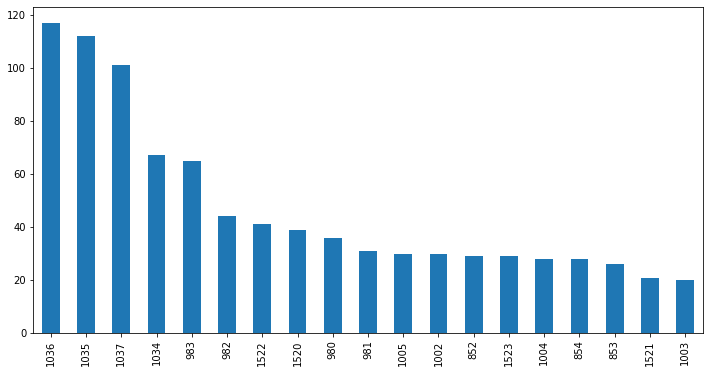

In [101]:
#Gráfico de barras
df['LojaID'].value_counts(ascending=False).plot.bar(figsize=(12, 6));

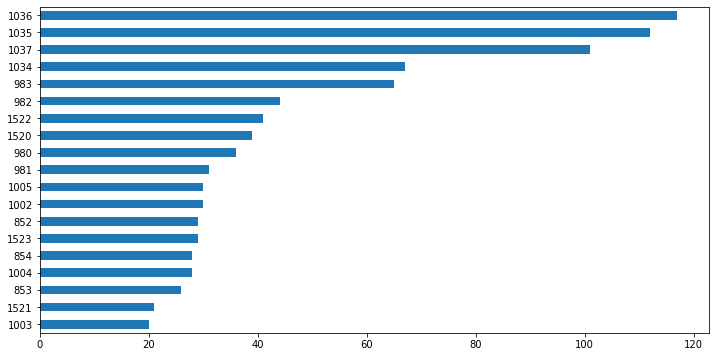

In [99]:
#Grafico de barras horizontails
df['LojaID'].value_counts(ascending=True).plot.barh(figsize=(12, 6));

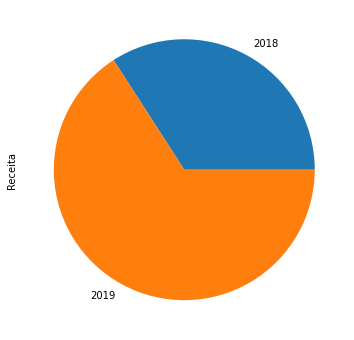

In [104]:
#Grafico de Pizza
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie(figsize=(12, 6));

In [105]:
#Total de vendas por cidade
df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

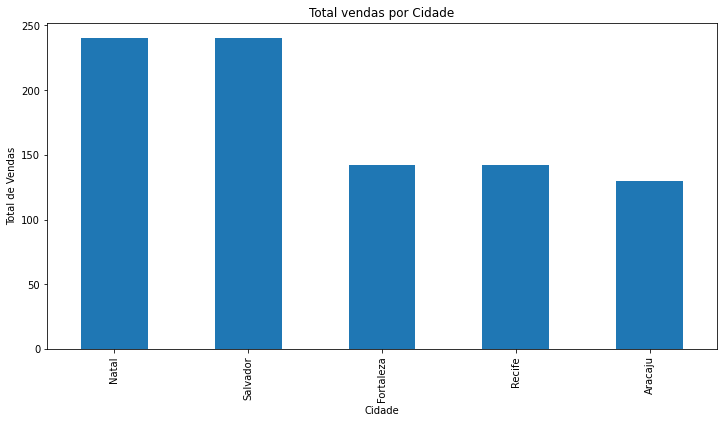

In [112]:
#Adicionando um titulo e alterando o nome dos eixos 
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Total vendas por Cidade', figsize=(12, 6))
plt.xlabel('Cidade')
plt.ylabel('Total de Vendas');

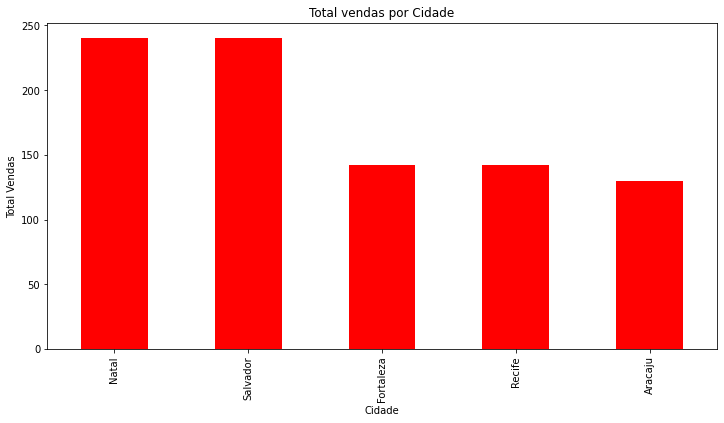

In [111]:
#Alterando a cor
df['Cidade'].value_counts().plot.bar(title='Total vendas por Cidade', color='red', figsize=(12, 6))
plt.xlabel('Cidade')
plt.ylabel('Total Vendas');

In [115]:
#Alterando o estilo
plt.style.use('ggplot')

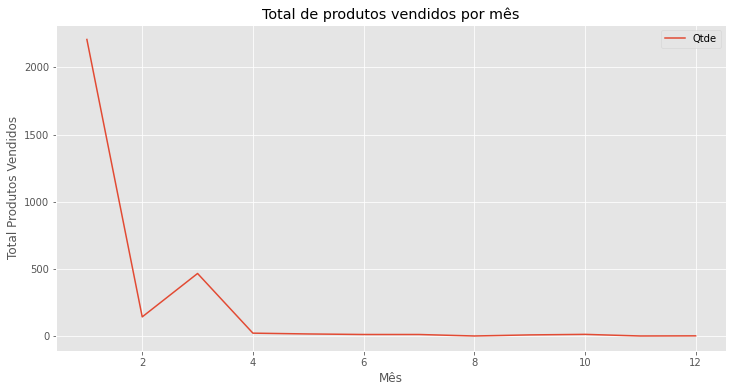

In [120]:
df.groupby(df['mes_venda'])['Qtde'].sum().plot(title='Total de produtos vendidos por mês',figsize=(12, 6))
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos');
plt.legend();

In [123]:
df.groupby(df['mes_venda'])['Qtde'].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [124]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df['Ano_venda'] == 2019]

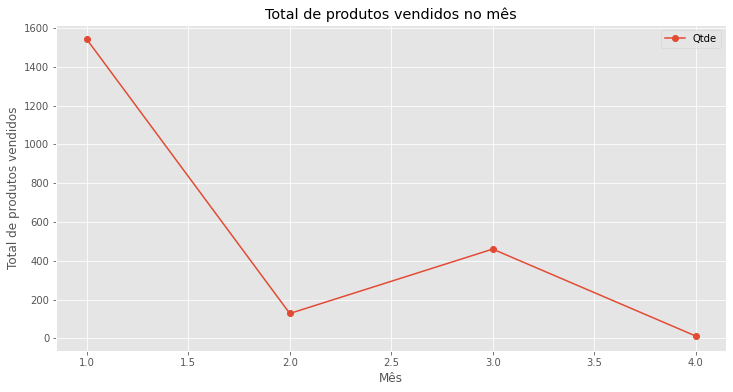

In [137]:
#Total de produtos vendido no mês
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(title='Total de produtos vendidos no mês',marker='o', figsize=(12, 6))
plt.xlabel('Mês')
plt.ylabel('Total de produtos vendidos')
plt.legend();

''

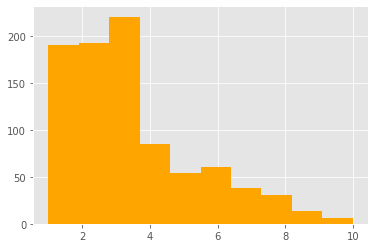

In [161]:
#Histograma
plt.hist(df['Qtde'], color='orange');

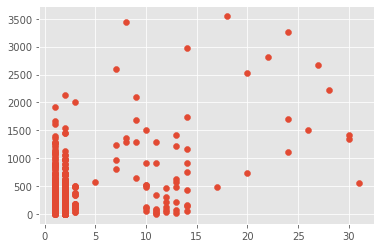

In [169]:
plt.scatter(x=df_2019['dia_venda'], y=df_2019['Receita']);

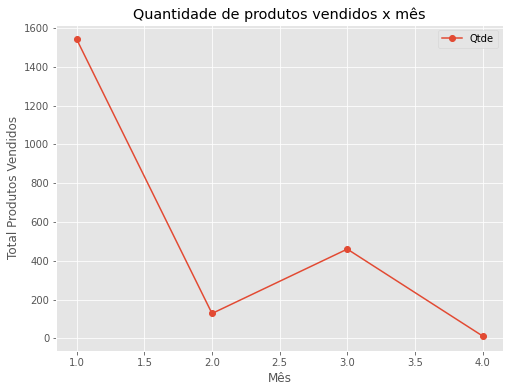

In [171]:
#Salvando em png
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker='o', figsize=(8, 6))
plt.title('Quantidade de produtos vendidos x mês')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos');
plt.legend()
plt.savefig('Gráfico QTDE X MES.png')